In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
data_info = pd.read_csv('DATA/lending_club_info.csv', index_col = 'LoanStatNew')
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [3]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [4]:
data = pd.read_csv('DATA/lending_club_loan_two.csv')

In [5]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [6]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [8]:
data['term'] = data['term'].apply(lambda x: int(x.split()[0]))

In [9]:
data['term'].head()

0    36
1    36
2    36
3    36
4    60
Name: term, dtype: int64

In [10]:
data['title'].count()

394275

In [11]:
# dealing with job titles
# sns.countplot(data['title']
'''index = 0
for i in range(10000):
    x = data['title'].value_counts().iloc[i]
    if x == 1:
        break
    index += 1
print(index)
# 7019 categories with more than 1 entry
'''

"index = 0\nfor i in range(10000):\n    x = data['title'].value_counts().iloc[i]\n    if x == 1:\n        break\n    index += 1\nprint(index)\n# 7019 categories with more than 1 entry\n"

In [12]:
data['title'].value_counts()[22]

919

In [13]:
title_df = data['title'].value_counts()[0:22].to_frame()
title_df

,title
Debt consolidation,152472
Credit card refinancing,51487
Home improvement,15264
Other,12930
Debt Consolidation,11608
Major purchase,4769
Consolidation,3852
debt consolidation,3547
Business,2949
Debt Consolidation Loan,2864


In [14]:
def title_categorizer(string):
    if (not set(string.lower().split()).isdisjoint(['car', 'vehicle', 'motorcycle', 'truck', 'boat', 'jetski', 'bike'])):
        return 'Vehicle related'
    if (not set(string.lower().split()).isdisjoint(['debt','consolidation','consolidate', 'debt_consolidation', 'payoff'])):
        return 'Debt related'
    if (not set(string.lower().split()).isdisjoint(['credit', 'creditcard', 'cards', 'card', 'cc'])):
        return 'Credit Card Related'
    if (not set(string.lower().split()).isdisjoint(['home', 'mortgage', 'house', 'moving', 'move', 'remodel', 'remodeling', 'renovations'])):
        return 'Home related'
    if (not set(string.lower().split()).isdisjoint(['company', 'business', 'startup', 'start up'])):
        return 'Business related'
    if (not set(string.lower().split()).isdisjoint(['payment', 'wedding', 'bill', 'purchase', 'medical', 'bills'])):
        return 'Bill related'
    if (not set(string.lower().split()).isdisjoint(['personal', 'vacation', 'traveling', 'travel', 'trip', 'getaway', 'loan', 'lending','freedom', 'fresh', 'start', 'off', 'relief'])):
        return 'Personal loan'
    else:
        return 'Other'
    
x = data['title'].apply(lambda x: title_categorizer(str(x)))
x.value_counts()

Debt related           214350
Credit Card Related     68039
Other                   45147
Home related            25440
Personal loan           20521
Bill related            13235
Business related         4662
Vehicle related          4636
Name: title, dtype: int64

In [15]:
df = data.drop('emp_title', axis = 1)

In [16]:
df['title'].value_counts()

Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: title, Length: 48817, dtype: int64

In [17]:
df['title'] = df['title'].dropna().apply(lambda x: title_categorizer(str(x)))
df['title'].value_counts()

Debt related           214350
Credit Card Related     68039
Other                   43392
Home related            25440
Personal loan           20521
Bill related            13235
Business related         4662
Vehicle related          4636
Name: title, dtype: int64

In [18]:
df['title'] = df['title'].fillna('Other')

c:\Users\James\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='title', ylabel='count'>

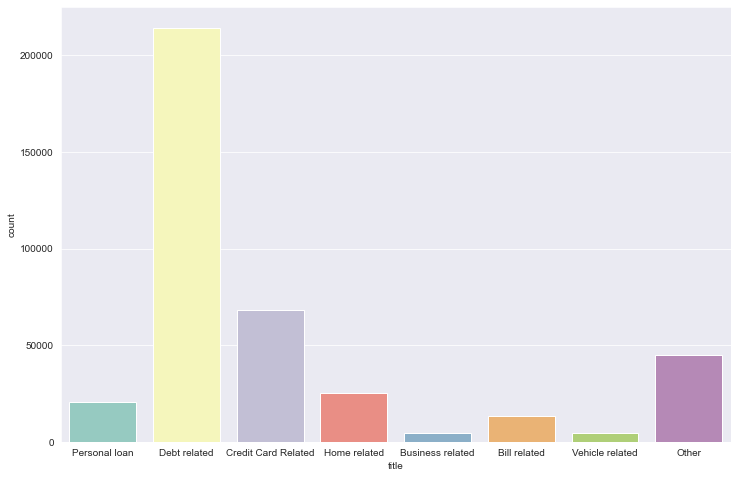

In [19]:
plt.figure(figsize = (12,8))
sns.countplot(df['title'])

In [20]:
def num_part(string):
    numeric = [value for value in string.split() if value.isdigit() == True]
    if len(numeric) != 0:
        return(int(numeric[0]))
    else:
        return string

In [21]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [22]:
def emp_categorizer(string):
    if string in ['4 years', '2 years', '3 years', '1 year']:
        return 'early'
    elif string == '< 1 year':
        return 'new'
    elif string in ['10+ years']:
        return 'experienced'
    elif string in ['9 years', '8 years', '7 years', '6 years', '5 years']:
        return 'slightly experienced'
    else:
        return string

In [23]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [24]:
df['emp_length'] = df['emp_length'].apply(emp_categorizer)

In [25]:
df['emp_length'].unique()

array(['experienced', 'early', 'new', 'slightly experienced', nan],
      dtype=object)

In [26]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [27]:
def ownership_categorizer(string):
    if string in ['OTHER', 'NONE', 'ANY']:
        return 'OTHER'
    else:
        return string

df['home_ownership'] = df['home_ownership'].apply(ownership_categorizer)
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [28]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [29]:
df['address'] = data['address']

<AxesSubplot:xlabel='address', ylabel='count'>

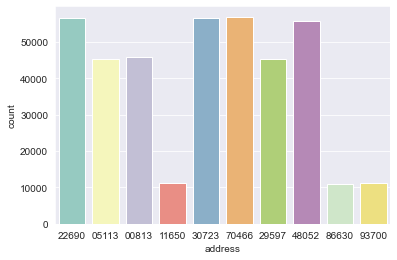

In [30]:
sns.countplot(x = df['address'].apply(lambda x: x.split()[-1]))

In [31]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [32]:
df['address'] = df['address'].apply(lambda x: x.split()[-1])
df['address'].head()

0    22690
1    05113
2    05113
3    00813
4    11650
Name: address, dtype: object

C:\Users\James\AppData\Local\Temp/ipykernel_12084/583560290.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  paid_rates_by_zip.append((len(df[df['address'] == addy ][df['loan_status'] == 'Fully Paid']['loan_status']))/(len(df[df['address'] == addy]['loan_status'])))


[0.8062164983105419, 1.0, 1.0, 0.0, 0.8050967354012663, 0.804369570939721, 1.0, 0.7998462006187742, 0.0, 0.0]


<AxesSubplot:>

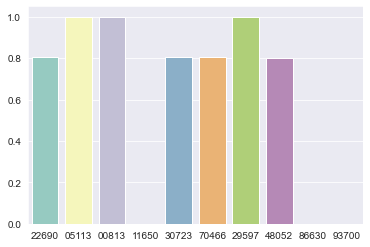

In [33]:
paid_rates_by_zip = []
for addy in df['address'].unique():
    paid_rates_by_zip.append((len(df[df['address'] == addy ][df['loan_status'] == 'Fully Paid']['loan_status']))/(len(df[df['address'] == addy]['loan_status'])))
print(paid_rates_by_zip)
sns.barplot(x = df['address'].unique(), y = paid_rates_by_zip)

<AxesSubplot:title={'center':'Paid Rates by ZIP'}>

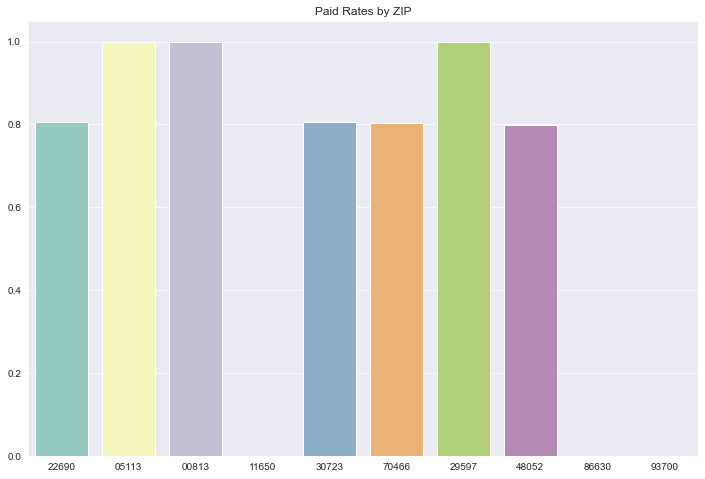

In [34]:
plt.figure(figsize = (12,8))
plt.title('Paid Rates by ZIP')
sns.barplot(x = df['address'].unique(), y = paid_rates_by_zip)

In [35]:
df['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 396030, dtype: object

In [36]:
df['issue_d'] = df['issue_d'].apply(lambda x: x.split('-')[0])

In [37]:
df['issue_d'].unique()

array(['Jan', 'Nov', 'Apr', 'Sep', 'Oct', 'Jun', 'May', 'Dec', 'Jul',
       'Feb', 'Mar', 'Aug'], dtype=object)

In [38]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [39]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [40]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: x.split('-')[-1])

In [41]:
df['earliest_cr_line'].unique()

array(['1990', '2004', '2007', '2006', '1999', '2005', '1994', '1997',
       '1984', '1995', '2001', '1982', '1996', '2000', '2003', '2008',
       '1998', '2002', '2009', '1992', '1988', '2010', '1986', '2012',
       '1978', '1993', '1983', '1989', '1991', '2011', '1980', '1981',
       '1987', '1985', '1967', '1972', '1969', '1979', '1965', '1977',
       '1974', '1976', '1975', '1971', '2013', '1964', '1970', '1973',
       '1963', '1960', '1966', '1961', '1968', '1958', '1955', '1953',
       '1959', '1962', '1944', '1956', '1951', '1957', '1950', '1954',
       '1948'], dtype=object)

In [42]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(int)

In [43]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,B,B4,experienced,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,22690
1,8000.0,36,11.99,265.68,B,B5,early,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,05113
2,15600.0,36,10.49,506.97,B,B3,new,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,05113
3,7200.0,36,6.49,220.65,A,A2,slightly experienced,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,00813
4,24375.0,60,17.27,609.33,C,C5,slightly experienced,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,11650


In [44]:
df.describe()

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,41.698053,13.639400,431.849698,7.420318e+04,17.379514,1997.857667,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,10.212038,4.472157,250.727790,6.163762e+04,18.019092,7.198387,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,36.000000,5.320000,16.080000,0.000000e+00,0.000000,1944.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,36.000000,10.490000,250.330000,4.500000e+04,11.280000,1994.000000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,36.000000,13.330000,375.430000,6.400000e+04,16.910000,1999.000000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,36.000000,16.490000,567.300000,9.000000e+04,22.980000,2003.000000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,60.000000,30.990000,1533.810000,8.706582e+06,9999.000000,2013.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            377729 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 396030 non-null  object 
 14  dti                   396030 non-null  float64
 15  

In [46]:
df['revol_util'].isnull().sum()

276

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

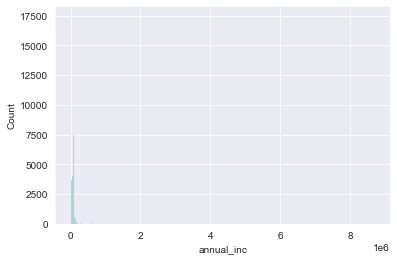

In [47]:
sns.histplot(df['annual_inc'])

In [48]:
df['annual_inc'].sort_values(ascending = False).head(20)

308700    8706582.0
318255    7600000.0
100370    7446395.0
376306    7141778.0
100946    7000000.0
117632    6500000.0
16169     6100000.0
165401    6000000.0
391587    6000000.0
308857    5000000.0
222183    4900000.0
292364    4300000.0
160878    3964280.0
162139    3900000.0
1831      2500000.0
380456    2300000.0
327696    2300000.0
348189    2039784.0
249258    2000000.0
248923    2000000.0
Name: annual_inc, dtype: float64

c:\Users\James\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revol_util', ylabel='Density'>

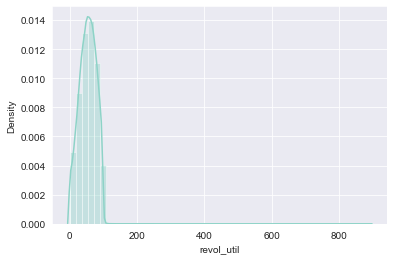

In [49]:
sns.distplot(df['revol_util'])

In [50]:
df['revol_util'].fillna(value = df['revol_util'].mean(), inplace = True)

In [51]:
df['mort_acc'].fillna(value = df['mort_acc'].mean(), inplace = True)

In [52]:
df['pub_rec_bankruptcies'].fillna(value = df['pub_rec_bankruptcies'].mean(), inplace = True)

In [53]:
df['emp_length'].fillna(value = 'Not Reported', inplace = True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_length            396030 non-null  object 
 7   home_ownership        396030 non-null  object 
 8   annual_inc            396030 non-null  float64
 9   verification_status   396030 non-null  object 
 10  issue_d               396030 non-null  object 
 11  loan_status           396030 non-null  object 
 12  purpose               396030 non-null  object 
 13  title                 396030 non-null  object 
 14  dti                   396030 non-null  float64
 15  

In [55]:
# all columns have now been put into useful categories and/or had Null values dealt with

In [56]:

# pd.get_dummies(df['Sex'])
# function that creates dummy (indicator) variables for categorical variables
# pd.get_dummies(df['Sex'], drop_first = True)
# we don't need every columns ( need n-1 to avoid multi-collinearity)
sub_grade = pd.get_dummies(df['sub_grade'], drop_first = True)
emp_length = pd.get_dummies(df['emp_length'], drop_first = True)
home_ownership = pd.get_dummies(df['home_ownership'], drop_first = True)
verification = pd.get_dummies(df['verification_status'], drop_first = True)
issue_date = pd.get_dummies(df['issue_d'], drop_first = True)
purpose = pd.get_dummies(df['purpose'], drop_first = True)
title = pd.get_dummies(df['title'], drop_first = True)
initial_status = pd.get_dummies(df['initial_list_status'], drop_first = True)
app_type = pd.get_dummies(df['application_type'], drop_first = True)
address = pd.get_dummies(df['address'], drop_first = True)
loan_status = pd.get_dummies(df['loan_status'], drop_first = True)

In [57]:
df2 = df

In [58]:
df2 = pd.concat([sub_grade, emp_length, home_ownership, verification, title, initial_status, app_type, address, loan_status], axis = 1, join = 'inner')

In [59]:
df2.head()

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,Fully Paid
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [60]:
nocat_df = df.select_dtypes(include = 'number')

In [61]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [62]:
df2 = pd.concat([df2,nocat_df], axis = 1, join = 'inner')

In [63]:
df2.head()

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,0,0,0,0,0,0,0,1,0,0,...,117000.0,26.24,1990,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,0,0,0,0,0,0,0,0,1,0,...,65000.0,22.05,2004,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,0,0,0,0,0,0,1,0,0,0,...,43057.0,12.79,2007,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,54000.0,2.60,2006,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,55000.0,33.95,1999,13.0,0.0,24584.0,69.8,43.0,1.0,0.0


In [64]:
from sklearn.model_selection import train_test_split

In [128]:
X = df2.drop('Fully Paid', axis = 1)

In [129]:
Y = df2['Fully Paid']

In [130]:
Y.head()

0    1
1    1
2    1
3    1
4    0
Name: Fully Paid, dtype: uint8

In [131]:
df2['Fully Paid'].unique()

array([1, 0], dtype=uint8)

In [132]:
X_train, X_test, Y_train, Y_test = train_test_split(
...     X, Y, test_size=0.3)

In [133]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [134]:
scaler.fit(X_train)

MinMaxScaler()

In [135]:
X_train = scaler.transform(X_train)

In [136]:
X_test = scaler.transform(X_test)

In [137]:
import tensorflow as tf

In [138]:
from  tensorflow.keras.models import Sequential

In [139]:
from tensorflow.keras.layers import Dense,Dropout

In [140]:
X_train.shape

(277221, 76)

In [142]:
model = Sequential()

# hidden layers
model.add(Dense(76, activation = 'relu'))
model.add(Dense(38, activation = 'relu'))

# output layer
model.add(Dense(units = 1, activation = 'sigmoid'))

# compiling with regression optimizer and loss function
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [143]:
from tensorflow.keras.callbacks import EarlyStopping

In [144]:
callback = EarlyStopping(monitor='loss', patience=3)
model.fit( x = X_train, y = Y_train, epochs = 20, callbacks = [callback])

Epoch 1/20
8664/8664 [==============================] - 22s 2ms/step - loss: 0.2715
Epoch 2/20
8664/8664 [==============================] - 20s 2ms/step - loss: 0.2605
Epoch 3/20
8664/8664 [==============================] - 19s 2ms/step - loss: 0.2592
Epoch 4/20
8664/8664 [==============================] - 18s 2ms/step - loss: 0.2585
Epoch 5/20
8664/8664 [==============================] - 17s 2ms/step - loss: 0.2579
Epoch 6/20
8664/8664 [==============================] - 17s 2ms/step - loss: 0.2576
Epoch 7/20
8664/8664 [==============================] - 20s 2ms/step - loss: 0.2570
Epoch 8/20
8664/8664 [==============================] - 21s 2ms/step - loss: 0.2567
Epoch 9/20
8664/8664 [==============================] - 19s 2ms/step - loss: 0.2563
Epoch 10/20
8664/8664 [==============================] - 20s 2ms/step - loss: 0.2558
Epoch 11/20
8664/8664 [==============================] - 20s 2ms/step - loss: 0.2555
Epoch 12/20
8664/8664 [==============================] - 19s 2ms/step - lo

<AxesSubplot:>

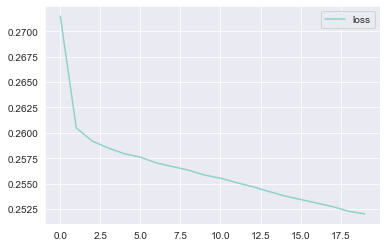

In [145]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [146]:
model.evaluate(X_test, Y_test, verbose = 0)

0.26121047139167786

In [147]:
test_predictions = model.predict(X_test)

3713/3713 [==============================] - 6s 2ms/step


In [151]:
classes_x = np.argmax(test_predictions, axis = 1)

In [152]:
test_predictions = pd.Series(classes_x.reshape(118809,))

In [153]:
test_predictions.unique()

array([0], dtype=int64)

In [155]:
from sklearn.metrics import classification_report, confusion_matrix

In [156]:
print(classification_report(Y_test, classes_x))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33     23343
           1       0.00      0.00      0.00     95466

    accuracy                           0.20    118809
   macro avg       0.10      0.50      0.16    118809
weighted avg       0.04      0.20      0.06    118809



c:\Users\James\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\James\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\James\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Y_test.unique()

array([1, 0], dtype=uint8)